<a href="https://colab.research.google.com/github/DivyaVerma21/Airbnb-reviews-sentiment-analysis/blob/main/airbnb_review_sentiment_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import files

# Upload the dataset file
uploaded = files.upload()


Saving tripadvisor_hotel_reviews.csv to tripadvisor_hotel_reviews.csv


In [4]:
import pandas as pd
df = pd.read_csv('tripadvisor_hotel_reviews.csv')
print(df.head())


                                              Review  Rating
0  nice hotel expensive parking got good deal sta...       4
1  ok nothing special charge diamond member hilto...       2
2  nice rooms not 4* experience hotel monaco seat...       3
3  unique, great stay, wonderful time hotel monac...       5
4  great stay great stay, went seahawk game aweso...       5


In [5]:
df.head()


,Review,Rating
0,nice hotel expensive parking got good deal sta...,4
1,ok nothing special charge diamond member hilto...,2
2,nice rooms not 4* experience hotel monaco seat...,3
3,"unique, great stay, wonderful time hotel monac...",5
4,"great stay great stay, went seahawk game aweso...",5


In [6]:
# Display the shape of the dataset
print("Shape of the dataset:", df.shape)

# Display summary statistics n
print("\nSummary statistics for 'Rating' column:")
print(df['Rating'].describe())


Shape of the dataset: (20491, 2)

Summary statistics for 'Rating' column:
count    20491.000000
mean         3.952223
std          1.233030
min          1.000000
25%          3.000000
50%          4.000000
75%          5.000000
max          5.000000
Name: Rating, dtype: float64


<ipython-input-7-5b64fc9c0862>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Rating', data=df, palette='viridis')


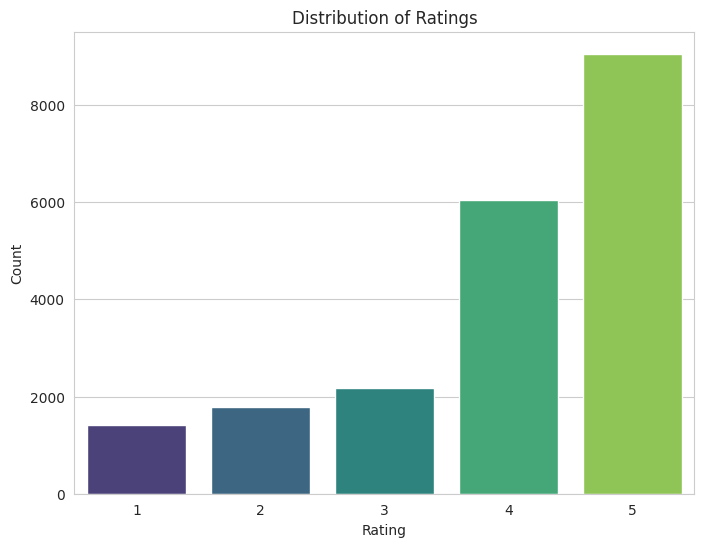

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style of seaborn
sns.set_style("whitegrid")

# Plot the distribution of ratings
plt.figure(figsize=(8, 6))
sns.countplot(x='Rating', data=df, palette='viridis')
plt.title('Distribution of Ratings')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.show()


In [8]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import string

# Download NLTK resources (if necessary)
nltk.download('punkt')
nltk.download('stopwords')

# Function to preprocess text
def preprocess_text(text):
    # Convert text to lowercase
    text = text.lower()

    # Remove punctuation
    text = text.translate(str.maketrans('', '', string.punctuation))

    # Tokenization
    tokens = word_tokenize(text)

    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    filtered_tokens = [token for token in tokens if token not in stop_words]

    # Join tokens back into text
    preprocessed_text = ' '.join(filtered_tokens)

    return preprocessed_text

# Apply preprocessing to the 'Review' column
df['CleanedReview'] = df['Review'].apply(preprocess_text)

# Display the preprocessed text
print("Original Review:\n", df['Review'][0])
print("\nPreprocessed Review:\n", df['CleanedReview'][0])


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


Original Review:
 nice hotel expensive parking got good deal stay hotel anniversary, arrived late evening took advice previous reviews did valet parking, check quick easy, little disappointed non-existent view room room clean nice size, bed comfortable woke stiff neck high pillows, not soundproof like heard music room night morning loud bangs doors opening closing hear people talking hallway, maybe just noisy neighbors, aveda bath products nice, did not goldfish stay nice touch taken advantage staying longer, location great walking distance shopping, overall nice experience having pay 40 parking night,  

Preprocessed Review:
 nice hotel expensive parking got good deal stay hotel anniversary arrived late evening took advice previous reviews valet parking check quick easy little disappointed nonexistent view room room clean nice size bed comfortable woke stiff neck high pillows soundproof like heard music room night morning loud bangs doors opening closing hear people talking hallway ma

In [9]:
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer

# Download VADER lexicon (if necessary)
nltk.download('vader_lexicon')

# Initialize the VADER sentiment analyzer
sid = SentimentIntensityAnalyzer()

# Function to get sentiment scores for a text
def get_sentiment_scores(text):
    # Get sentiment scores using VADER
    scores = sid.polarity_scores(text)
    # Return compound score (normalized score)
    return scores['compound']

# Apply sentiment analysis to the 'CleanedReview' column
df['SentimentScore'] = df['CleanedReview'].apply(get_sentiment_scores)

# Display the first few rows of the DataFrame with sentiment scores
print(df[['Review', 'SentimentScore']].head())


[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


                                              Review  SentimentScore
0  nice hotel expensive parking got good deal sta...          0.9808
1  ok nothing special charge diamond member hilto...          0.9946
2  nice rooms not 4* experience hotel monaco seat...          0.9923
3  unique, great stay, wonderful time hotel monac...          0.9949
4  great stay great stay, went seahawk game aweso...          0.9949


In [10]:
# Function to assign sentiment labels based on sentiment scores
def get_sentiment_label(score, threshold_pos=0.1, threshold_neg=-0.1):
    if score > threshold_pos:
        return 'Positive'
    elif score < threshold_neg:
        return 'Negative'
    else:
        return 'Neutral'

# Define threshold values
threshold_positive = 0.1
threshold_negative = -0.1

# Apply sentiment labels to the 'SentimentScore' column
df['SentimentLabel'] = df['SentimentScore'].apply(lambda score: get_sentiment_label(score, threshold_pos=threshold_positive, threshold_neg=threshold_negative))

# Display the first few rows of the DataFrame with sentiment labels
print(df[['Review', 'SentimentScore', 'SentimentLabel']].head())


                                              Review  SentimentScore  \
0  nice hotel expensive parking got good deal sta...          0.9808   
1  ok nothing special charge diamond member hilto...          0.9946   
2  nice rooms not 4* experience hotel monaco seat...          0.9923   
3  unique, great stay, wonderful time hotel monac...          0.9949   
4  great stay great stay, went seahawk game aweso...          0.9949   

  SentimentLabel  
0       Positive  
1       Positive  
2       Positive  
3       Positive  
4       Positive  


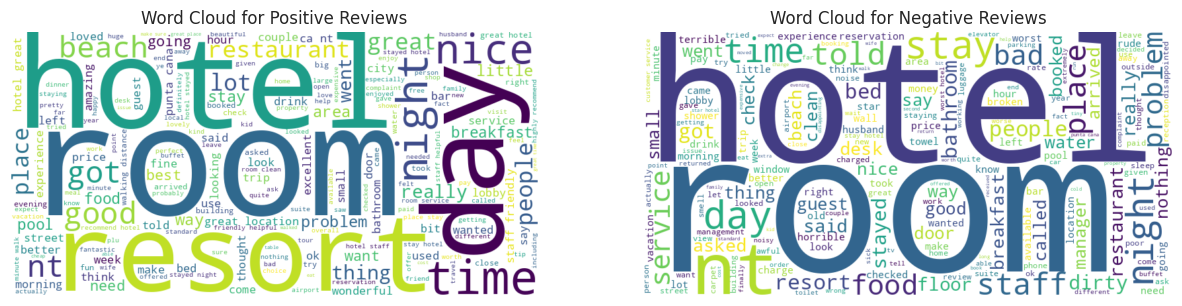

In [11]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Extract text of positive and negative reviews
positive_reviews = ' '.join(df[df['SentimentLabel'] == 'Positive']['CleanedReview'])
negative_reviews = ' '.join(df[df['SentimentLabel'] == 'Negative']['CleanedReview'])

# Create word cloud for positive reviews
wordcloud_positive = WordCloud(width=800, height=400, background_color='white').generate(positive_reviews)

# Create word cloud for negative reviews
wordcloud_negative = WordCloud(width=800, height=400, background_color='white').generate(negative_reviews)

# Display word clouds
plt.figure(figsize=(15, 6))
plt.subplot(1, 2, 1)
plt.imshow(wordcloud_positive, interpolation='bilinear')
plt.title('Word Cloud for Positive Reviews')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(wordcloud_negative, interpolation='bilinear')
plt.title('Word Cloud for Negative Reviews')
plt.axis('off')

plt.show()
